Project Unit 0



# Fourier Series: A tutorial

Baron Jean Baptiste Joseph Fourier created the idea of being able to unfold or decompose periodic functions in a way that they can be written with the sum of sines and cosines. Thus, the birth of Fourier Series:

A fourier series is a tool is to combine a complex periodic function, into one equation, for example if you had:

$$y_0 = A_0$$

$$y_1 = A_1 sin(\omega t+a_1)$$

$$y_2 = A_2 sin(2\omega t+a_2)$$

$$y_3 = A_3 sin(3\omega t+a_3)$$
(1.0)


They could be combined and written as:
$$ f(x)= \frac {a_0}{2} + (a_1 cos(\omega x) + b_1 sin(\omega x)) + (a_2 cos(\omega x) + b_2 sin(\omega x))$$
(1.1)


The above equation (1.1) is known as the generalized Fourier series. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

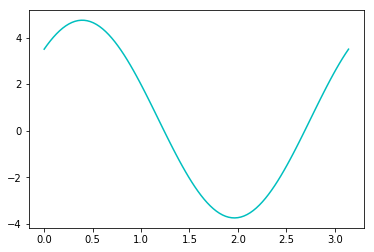

In [17]:
#Using the above equation (1.1):
xdata = np.linspace(0, np.pi, 100)
   
def fourier(x, omega, a0, a1, b1, a2, b2, a3, b3):
    ans = a0/2 + (b1*np.sin(omega*x)) + (a1*np.cos(omega*x)) + (b2*np.sin(omega*x)) + (a2*np.cos(omega*x)) + (b3*np.sin(omega*x)) + (a3*np.cos(omega*x))
    return ans

T = np.pi
Omega = (2*np.pi)/T

plt.plot(xdata, fourier(xdata, Omega, 1, 1, 1, 1, 1, 1, 1), 'c')  

#Put your x first for the curvefit function.

Changing the coefficents changes the curve of the line, make your own curve with your own coefficents in the Fourier Series equation.

Choose coefficients between -1, and 1

In [18]:
A0 = 0.3

In [19]:
A1 = 0.1

In [20]:
B1 = 1

In [21]:
A2 = .4

In [22]:
B2 = 1

In [23]:
A3 = .2

In [24]:
B3 = 0

In [25]:
T = 1
Omega = (2*np.pi/T)

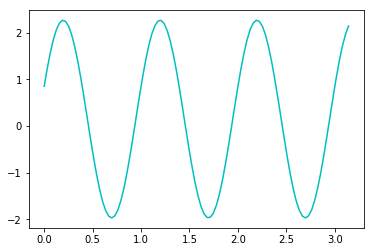

In [26]:
plt.plot(xdata, fourier(xdata, Omega, A0, A1, B1, A2, B2, A3, B3), 'c')

Above, you might notice that the Period(T) and the Omega have been decided for you, play around with those values and see how the curve changes:

In [27]:
T = .5

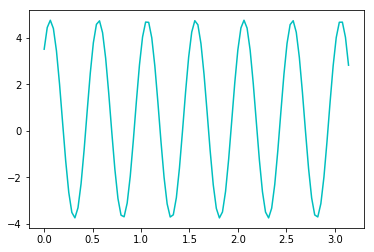

In [28]:
Omega = (2*np.pi/T)
plt.plot(xdata, fourier(xdata, Omega, 1, 1, 1, 1, 1, 1, 1), 'c')

What do you notice about smaller T imputs? 


What about when Larger T values are entered?

*When is this used in real life?*
    - Signal Processing
    - Image Processing
    - Radiation Measurements

If we are given the following equation:
$$V(t)=a_1sin(ωt)+a_2sin(2ωt)+a_3sin(3ωt)+a_4sin(4ωt)$$

We can use a curve-fit line, to find the coefficents $$a_1, a_2, a_3, a_4.$$


[-4.16740393e-02 -1.33422956e+00  9.33320965e-01  9.69575968e-05
  6.99801288e-05]


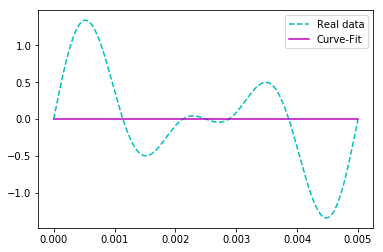

In [56]:
VelFunc = pd.read_table('dataset.txt')
#print(VelFunc)
time = VelFunc['t (s)']
velocity = VelFunc['V (volts)']

def fourier(a1, a2, a3, a4, w, t):
    return a1*np.sin(w*t)+a2*np.sin(2*w*t)+a3*np.sin(3*w*t)+a4*np.sin(4*w*t)

parameters, stats = curve_fit(fourier, VelFunc['t (s)'], VelFunc['V (volts)'])
print(parameters)

a1_coef=parameters[0] #slope of best-fit line
a2_coef=parameters[1] #intercept of best-fit line
a3_coef = parameters[2]
a4_coef = parameters[3]


model = fourier(time, *parameters)

plt.plot(time, velocity, 'c--', label="Real data") 
plt.plot(time, model,'m-', label="Curve-Fit") 
plt.legend()

Or we can approximate it with an exponential function:

[1.16897367e+00 1.31835889e+03]


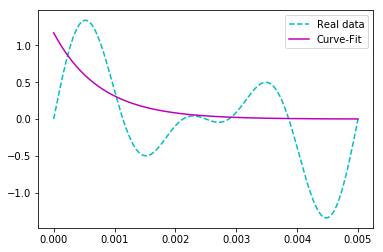

In [55]:
VelFunc = pd.read_table('dataset.txt')

def expfunc(x, V, r):
    return V*np.exp(-r*x)

parameters, stats = curve_fit(expfunc, VelFunc['t (s)'], VelFunc['V (volts)'])
print(parameters)

Vel_best=parameters[0]
r_best=parameters[1] 


time = VelFunc['t (s)']
velocity = VelFunc['V (volts)']

V_model = expfunc(time, Vel_best, r_best)

plt.plot(time, velocity, 'c--', label="Real data") 
plt.plot(time,V_model,'m-', label="Curve-Fit") 
plt.legend()

                                                                                      Creator: Megan Mouton, August 29th 2018

Sources:

      Henner, Victor, et al. Mathematical Methods in Physics: Partial Differential Equations, Fourier Series, and Special Functions. A K Peters, 2009.
      
      Weisstein, Eric W. "Fourier Series." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/FourierSeries.html
      
      “Fourier Series.” From Wolfram MathWorld, mathworld.wolfram.com/FourierSeries.html.